# Principal Component Analysis
Principal Component Analysis (PCA) is a dimensionality reduction technique that is used in both statistics and machine learning. It serves the purpose of transforming high-dimensional data into a new coordinate system, the principal components, where the data's variance is maximized along the axes. This transformation helps in capturing the key features of the data as well as reducing its dimensionality. Key steps of PCA include mean centering, calculating covariance matrix, eigen value decomposition, and selecting principal components.

## Dataset Description
I will use the data that comes from the possum data frame from the DAAG package in R. Detailed information can be seen in the README file.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
possum = pd.read_csv('possum.csv')

In [48]:
possum = possum.dropna()
possum = possum.drop(columns=['Pop','sex'], axis=1)
features = ['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

# standardize features
x = possum.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4)
PC = pca.fit_transform(x)

# PCA dataframe
df = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
df.head()


,PC1,PC2,PC3,PC4
0,-2.815165,1.319382,1.283392,1.000615
1,-1.883320,0.877116,0.773375,-0.269095
2,-3.442327,0.334891,-0.488829,-0.032150
3,-2.278639,1.072924,-0.186904,0.081082
4,-0.430862,1.864310,-0.207955,-0.406139


In [49]:
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.39275596 0.23146148 0.08935879 0.07443227]
per_var = [39.28 23.15  8.94  7.44] 



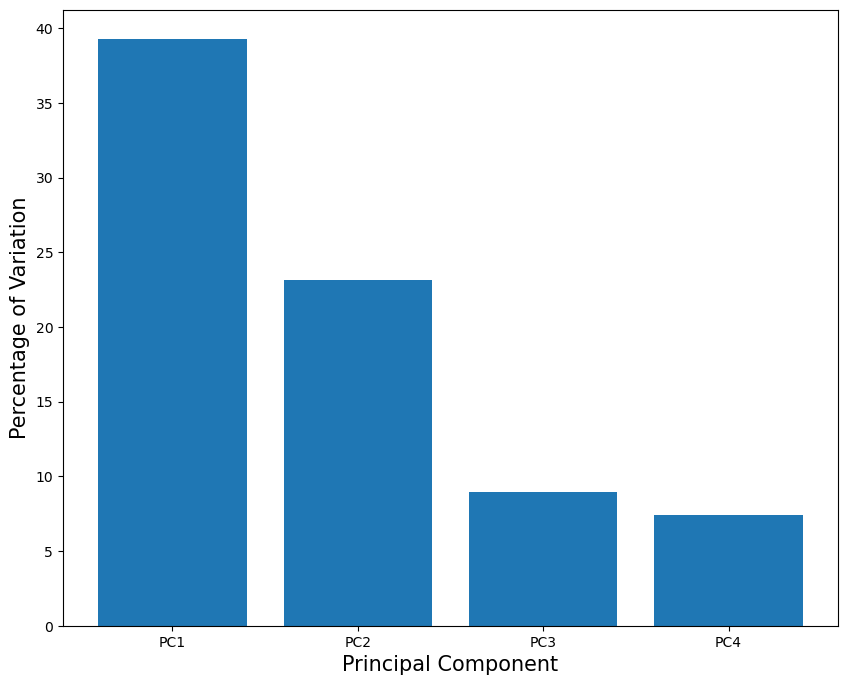

In [51]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.show()